In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_pickle("../ShapeDatabase_INFOMR_norm_features/feature_vector_df_normalized.pickle")

In [2]:
from collections import defaultdict
p = {
    "p": [],
    "r": [],
    "mrr": [],
}
p = defaultdict(lambda : defaultdict(list))
for k in range(5,101,5):
    performance = pickle.load(open(f"class_performance_top{k}.pickle", "rb"))
    value_counts_class = df["class_type"].value_counts()
    for class_type in performance.keys():
        s = []
        for it in performance[class_type]:
            s += [it["successes"]]
        s = np.asarray(s)
        mrr_range = np.arange(1,s.shape[1]+1)
        p[class_type]["p"] += [np.mean(np.sum(s, axis=1)/s.shape[1])]
        p[class_type]["r"] += [np.mean(np.sum(s, axis=1)/value_counts_class[class_type])]
        p[class_type]["mrr"] += [np.mean(np.max(s / np.arange(1,s.shape[1]+1), axis=1))]

In [3]:
df_allk = pd.DataFrame(p).T
p_allk = np.asarray(df_allk["p"].tolist())
r_allk = np.asarray(df_allk["r"].tolist())
mrr_allk = np.asarray(df_allk["mrr"].tolist())
p_allk_mean = np.mean(p_allk, axis=0)
r_allk_mean = np.mean(r_allk, axis=0)
mrr_allk_mean = np.mean(mrr_allk, axis=0)

In [4]:
mrr_allk_mean

array([0.37012882, 0.38597491, 0.391712  , 0.39400241, 0.39542112,
       0.39620685, 0.39675204, 0.3972457 , 0.39752308, 0.39771075,
       0.39789719, 0.39803251, 0.39813491, 0.39824298, 0.3983137 ,
       0.39838928, 0.39847614, 0.39854991, 0.39857832, 0.39862272])

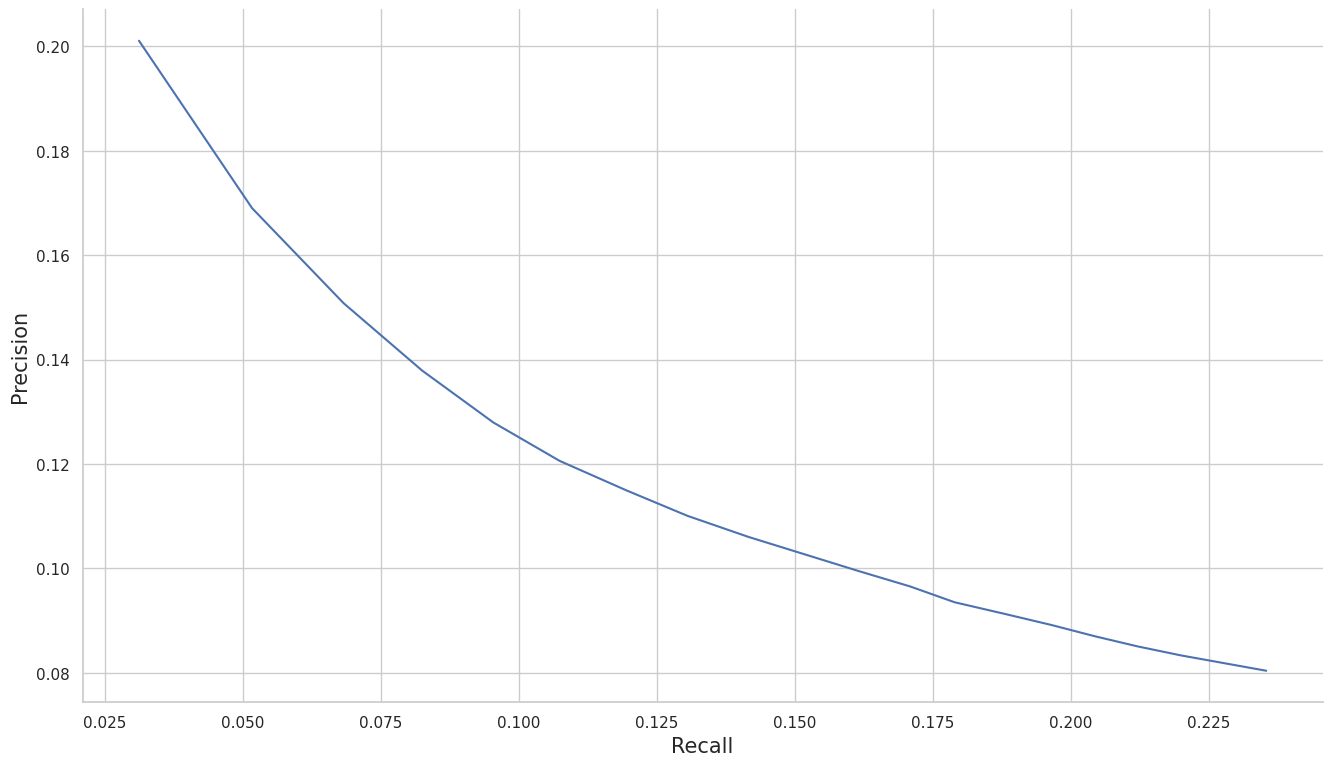

In [5]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16,9))
sns.lineplot(x=r_allk_mean, y=p_allk_mean)
sns.despine()
plt.ylabel(ylabel="Precision", size=15)
plt.xlabel(xlabel="Recall", size=15)
sns.despine()
plt.savefig(f"precision_recall_curve.png", transparent=True, bbox_inches="tight")
plt.show()

In [8]:
p = {}
performance = pickle.load(open("class_performance_top5.pickle", "rb"))

value_counts_class = df["class_type"].value_counts()
for class_type in performance.keys():
    s = []
    for it in performance[class_type]:
        s += [it["successes"]]
    s = np.asarray(s)
    mrr_range = np.arange(1,s.shape[1]+1)
    p[class_type] = {
        "p": np.mean(np.sum(s, axis=1)/s.shape[1]),
        "mrr": np.mean(np.max(s / np.arange(1,s.shape[1]+1), axis=1)),
        "r": np.mean(np.sum(s, axis=1)/value_counts_class[class_type])
    }

In [9]:
import pandas as pd
df_scores = pd.DataFrame(p).T
df_scores.sort_values("p", ascending=False)

,p,mrr,r
Chess,0.623810,0.875000,0.074263
HumanHead,0.611765,0.754902,0.059977
Hand,0.502703,0.905405,0.067933
Jet,0.495105,0.706410,0.017311
Bottle,0.477419,0.693548,0.077003
...,...,...,...
Drum,0.040000,0.082500,0.010000
Vase,0.030000,0.039167,0.007500
Bus,0.020000,0.029167,0.005000
Sign,0.013333,0.016667,0.004444


In [10]:
df_scores.loc["Vase"]

p      0.030000
mrr    0.039167
r      0.007500
Name: Vase, dtype: float64

In [11]:
np.mean(df_scores["p"]), np.mean(df_scores["mrr"]), np.mean(df_scores["r"])

(np.float64(0.20108547818303774),
 np.float64(0.37012882289991494),
 np.float64(0.031224404906417022))

In [12]:
def barplot_results(df: pd.DataFrame, score, ylabel):
    aux_df = df[score].sort_values(ascending=False)
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16,9))
    sns.barplot(aux_df)
    plt.xticks(rotation=90, size=12)
    plt.ylabel(ylabel, size=15)
    plt.xlabel(xlabel="Class", size=15)
    sns.despine()
    plt.savefig(f"{ylabel}_barplot.png", transparent=True, bbox_inches="tight")
    plt.show()

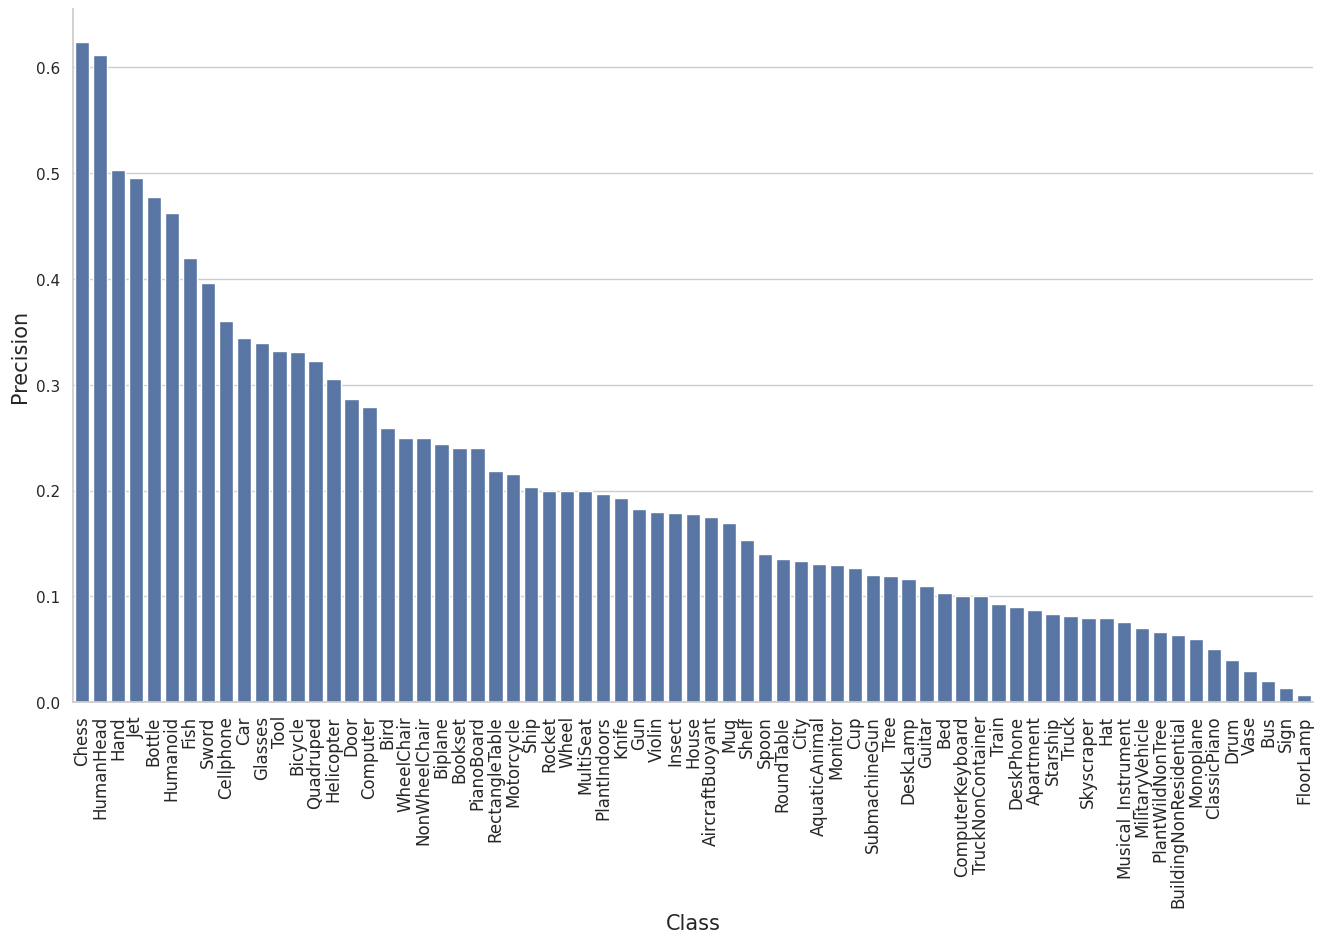

In [13]:
barplot_results(df_scores, "p", "Precision")

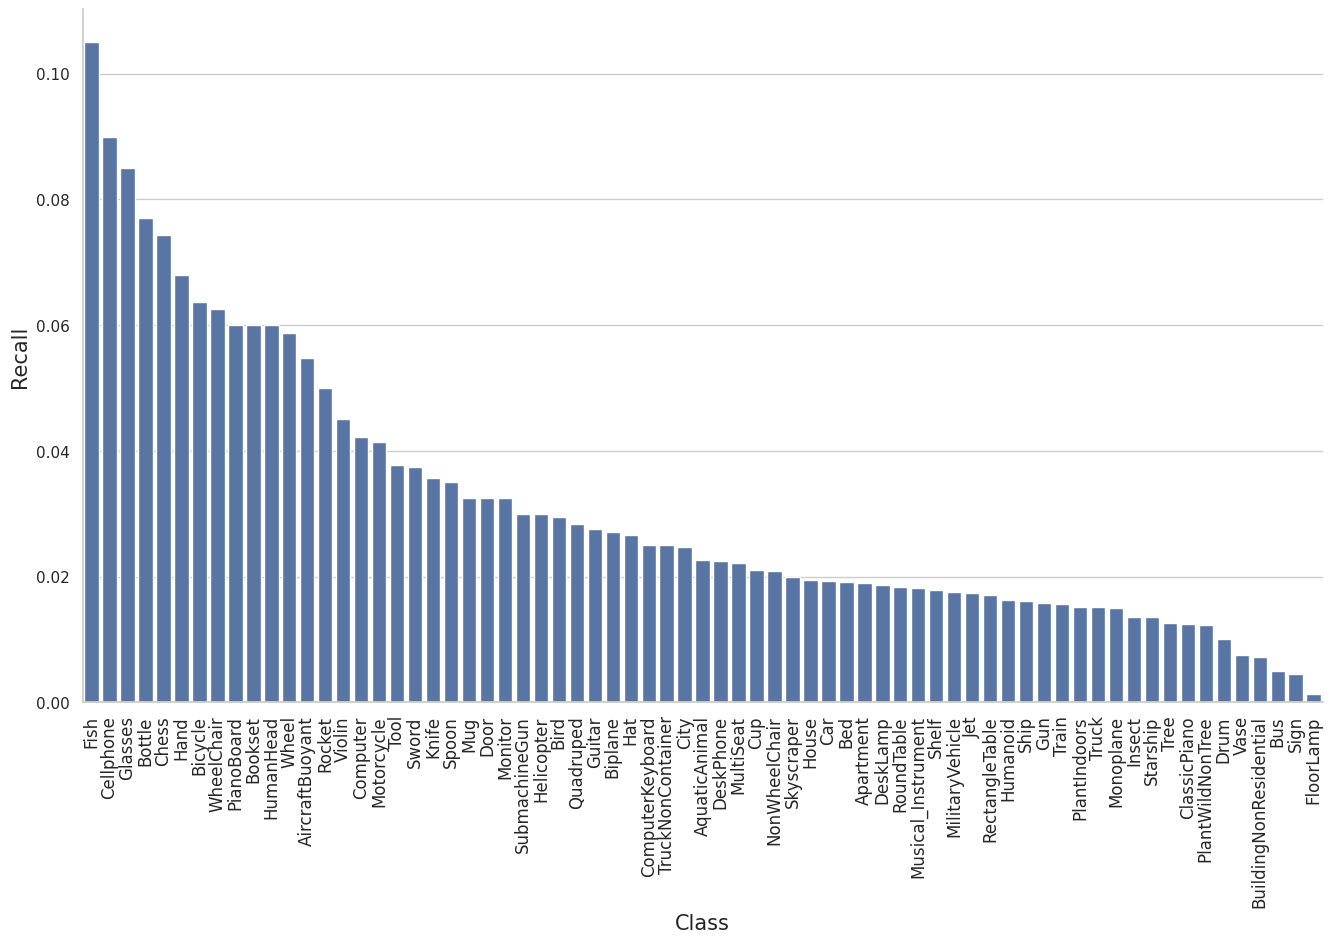

In [14]:
barplot_results(df_scores, "r", "Recall")

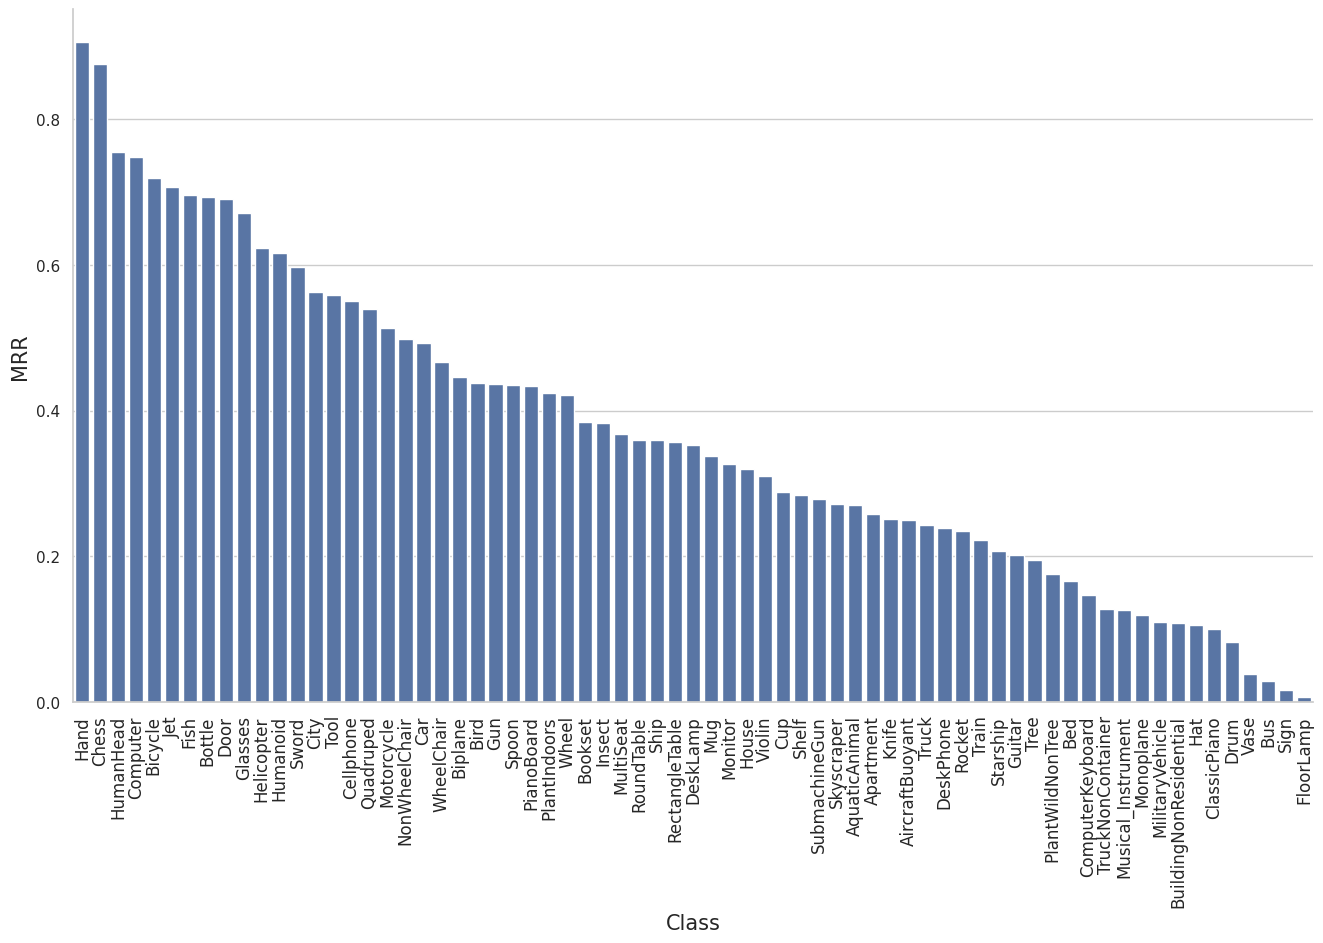

In [15]:
barplot_results(df_scores, "mrr", "MRR")